Files already downloaded and verified
Files already downloaded and verified
torch.Size([4, 3, 32, 32])


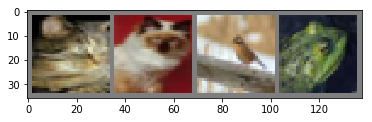

  cat   cat  bird  frog


In [14]:
import torch
import torchvision
from torch.autograd import Variable
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
from models import Cifar10_Net
from cifar10_dataloader import CIFAR10

##load data and check images and labels to make sure
c10 = CIFAR10()
c10.imshow()
# c10.bchw()

In [7]:
## initialize models, optimizer and criterion
net = Cifar10_Net()
lr = 0.001
momentum = 0.9

optimizer = optim.SGD(net.parameters(), lr, momentum)
criterion = nn.CrossEntropyLoss()


In [7]:
## start training for three epoch,
## each epoch go through all data in trainloader
for epoch in range(3):

    running_loss = 0.0
    for i, data in enumerate(c10.trainLoader()):
        input, label = data
        input, label = Variable(input), Variable(label)

        optimizer.zero_grad()

        output = net(input)
        loss = criterion(output, label)

        loss.backward()
        optimizer.step()

        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('training finished !!! You can try test images as you want!')

# print(c10.trainLoader().dataset)

[1,  2000] loss: 2.220
[1,  4000] loss: 1.870
[1,  6000] loss: 1.692
[1,  8000] loss: 1.582
[1, 10000] loss: 1.530
[1, 12000] loss: 1.437
[2,  2000] loss: 1.388
[2,  4000] loss: 1.378
[2,  6000] loss: 1.351
[2,  8000] loss: 1.333
[2, 10000] loss: 1.327
[2, 12000] loss: 1.283
[3,  2000] loss: 1.240
[3,  4000] loss: 1.224
[3,  6000] loss: 1.230
[3,  8000] loss: 1.200
[3, 10000] loss: 1.188
[3, 12000] loss: 1.198
training finished !!! You can try test images as you want!


before make_grid size: 
torch.Size([4, 3, 32, 32])
torch.Size([32, 32])
After make_grid size: 
torch.Size([3, 138, 36])
numpy shape is: 
(3, 138, 36)
np transpose shape is :
(138, 36, 3)


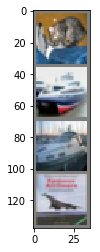

  cat  ship  ship plane
Variable containing:
-0.4568 -0.1581 -0.2844  1.0153 -0.5352  0.0934  1.3461 -1.2876 -0.0763  0.6177
 4.6958  5.2628 -1.6566 -1.8306 -4.6455 -4.7086 -6.0666 -4.4661  9.8404  3.9063
 1.6950  3.2068 -1.3514 -0.8352 -2.3920 -2.3824 -3.3514 -2.2798  4.5185  2.6659
 3.4784  1.3531 -0.3985 -1.0078 -1.0511 -3.1831 -2.8421 -2.0686  4.9160  1.9733
[torch.FloatTensor of size 4x10]

Predicted:   frog  ship  ship  ship


In [55]:
## test the model with test data
dataiter = iter(c10.testLoader())
images, labels = dataiter.next()

print("before make_grid size: ")
print(images.size())
print(images.size()[2:])
img = torchvision.utils.make_grid(images, nrow=1)
print("After make_grid size: ")
print(img.size())
img = img / 2 + 0.5
npimg = img.numpy()
print('numpy shape is: ')
print(npimg.shape)
print('np transpose shape is :')
print(np.transpose(npimg, (1,2,0)).shape)
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()
print(' '.join('%5s' % c10.classes[labels[j]] for j in range(4)))

#test the net
out = net(Variable(images))
print(out)
_, predicted = torch.max(out.data, 1)

print('Predicted: ', ' '.join('%5s' % c10.classes[predicted[j][0]] for j in range(4)))

